/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:162: ComplexWarning: Casting complex values to real discards the imaginary part
  LAMBDA[i,i] = ev[ind]
/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:163: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,i] = EV[:,ind]


Wrong estimated angle: -1.6859543096491165
True  estimated angle: -2.099139452733961


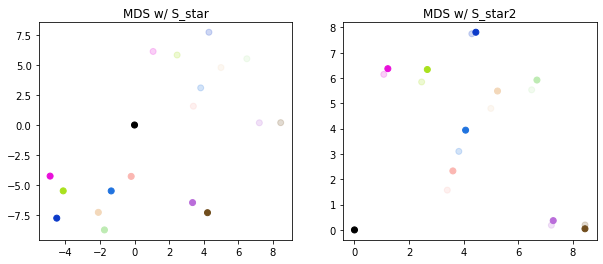

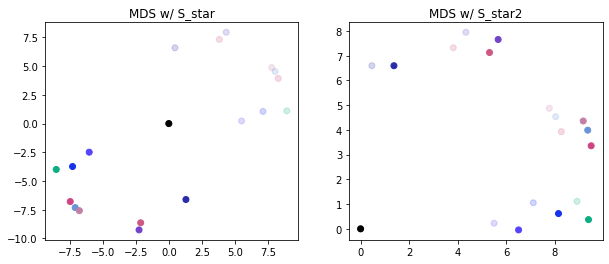

Wrong estimated angle: -2.446545098367161
True  estimated angle: -1.3385486640159168


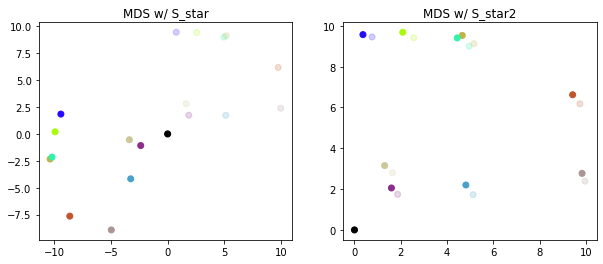

Wrong estimated angle: -2.2745485714474025
True  estimated angle: -1.510545190935675


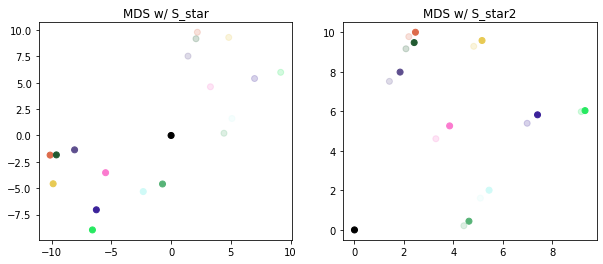

Wrong estimated angle: -3.0498596618331972
True  estimated angle: -0.7352341005498803


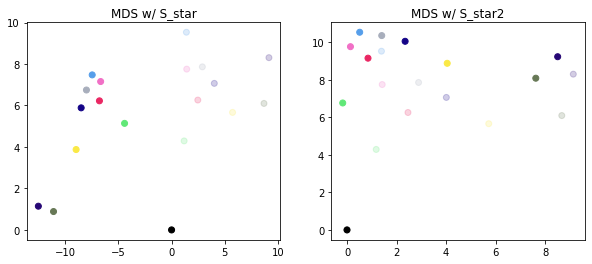

Wrong estimated angle: -2.457044959708709
True  estimated angle: -1.3280488026743684


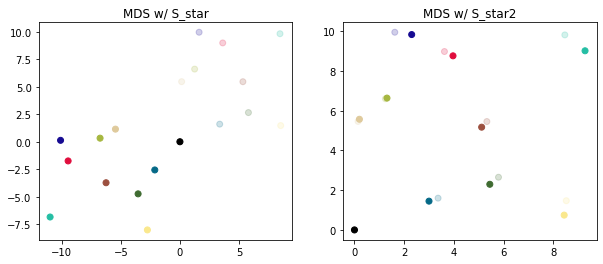

Wrong estimated angle: -2.8823508346477587
True  estimated angle: -0.9027429277353188


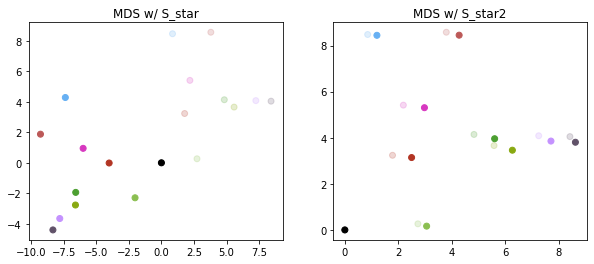

Wrong estimated angle: -2.749132250773799
True  estimated angle: -1.035961511609279


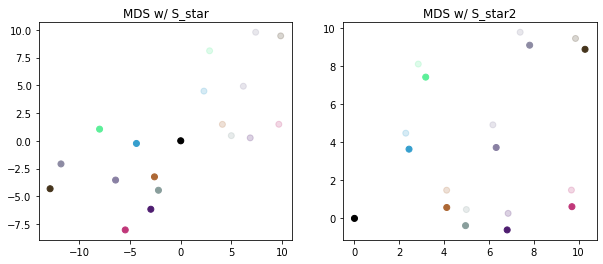

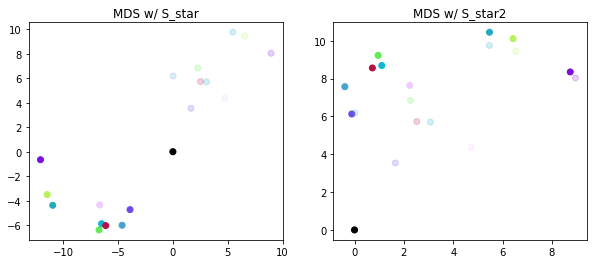

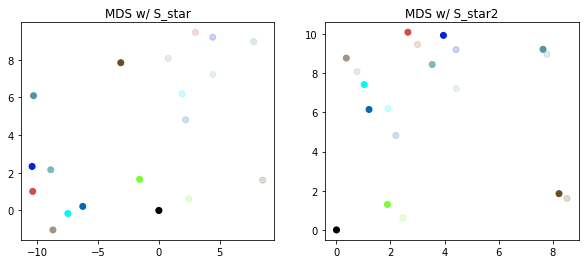

In [1]:
import numpy as np
from UAV import *
import random
import matplotlib.pyplot as plt   


n_robots = 10#int(input("number of robots: "))
n_components = 2



for _ in range(10):
    platoon = []


    # initialization of n robots
    for i in range(n_robots):
        if i==0:
            i_robot = Robot("op_" + str(i),0,0,0)
        else:
            i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
        platoon.append(i_robot)

    coordinates = [[],[],[]]

    for rob in platoon:
        coordinates = np.append(coordinates,rob.get_coords(),axis=1)

    #TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
    S = coordinates[0:2,:]

    DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas

    S_star = EVD(DM2,n_components)
    S_star = match_anchor(S,S_star,verbose=0)

    deltaX1 = 0.3
    deltaY1 = 0.1

    DeltaS_prime = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
    DeltaS_prime[:,0] = [deltaX1,deltaY1]

    S_prime = S + DeltaS_prime
    DM_prime = DM_from_S(S_prime,verbose=0)

    theta_r   = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],verbose=0)
    S_star2 = rotateMatrix(theta_r)@S_star

    deltaX2 = 0.7
    deltaY2 = 0.4

    DeltaS_prime2 = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
    DeltaS_prime2[:,0] = [deltaX2,deltaY2]

    S_prime2 = S + DeltaS_prime2
    DM_prime2 = DM_from_S(S_prime2,verbose=0)


    theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],approx=2,verbose=0)


    if (theta_r2 != 0):
        F = np.array([[-1,0],[0,1]])
            
        theta_r3 = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],verbose=0)
        theta_r3_a = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],approx=1,verbose=0)

        print("Wrong estimated angle:",theta_r)
        print("True  estimated angle:", theta_r3)

        S_star2 = rotateMatrix(theta_r3)@F@S_star


    plot_points(S,S_star  = S_star,
                S_star2 = S_star2
                )
    print(S-S_star2)